In [1]:
# TODO, show differences related to post-selecting for depth vs post-selectng for total gates added
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric
from mirror_gates.logging import transpile_benchy_logger

In [2]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")

In [3]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),  # 20,4,20
    SabreMS(
        coupling_map,
        name="SABREMS-Min-Swaps",
        cost_function="basic",
        fixed_aggression=1,
    ),
    SabreMS(
        coupling_map,
        name="SABREMS-Min-Depth",
        fixed_aggression=1,
    ),
]

metrics = [DepthMetric(consolidate=False), TotalMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=5,
    logger=transpile_benchy_logger,
)
benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...


Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/13 [00:00<?, ?it/s]INFO:transpile_benchy:Running benchmark for circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17


Loading qec9xz_n17 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qec9xz_n17
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on cir

Loading seca_n11 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit seca_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit se

Loading qram_n20 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit qram_n20
DEBU

Loading knn_n25 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit knn_n25
DEB

Loading swap_test_n25 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit swap_test_n25
DEBUG:transpile_benchy:Running transpiler SABREMS-Mi

Loading bigadder_n18 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit bigadder_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\text

Loading multiplier_n15 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit multiplier_n15
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-

Loading qft_n18 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n18
DEBUG:transpil

Loading sat_n11 from QASMBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit sat_n11
DEBUG:transpil

Loading portfolioqaoa_n16 from MQTBench


INFO:transpile_benchy:Running benchmark for circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit portfolioqaoa_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}

Loading qftentangled_n16 from MQTBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qftentangled_n16
DEBUG:transpile_benchy:Running trans

Loading qpeexact_n16 from MQTBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit qpeexact_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\text

Loading ae_n16 from MQTBench


DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Swaps-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:Running transpiler SABREMS-Min-Depth-$\sqrt{\texttt{iSWAP}}$ on circuit ae_n16
DEBUG:transpile_benchy:R

In [5]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -24.09522242134232,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'swap_test_n25'},
 'monodromy_total': {'average_change': -15.321282435493893,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'swap_test_n25'},
 'total_runtime': {'average_change': 12499.327349928957,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'qec9xz_n17'}}

In [6]:
benchmark.summary_statistics(transpilers[1], transpilers[2])

{'monodromy_depth': {'average_change': -7.524744889501477,
  'best_circuit': 'qft_n18',
  'worst_circuit': 'knn_n25'},
 'monodromy_total': {'average_change': 0.42968964593220677,
  'best_circuit': 'qft_n18',
  'worst_circuit': 'qec9xz_n17'},
 'total_runtime': {'average_change': 2.2382076831685356,
  'best_circuit': 'ae_n16',
  'worst_circuit': 'portfolioqaoa_n16'}}

In [7]:
benchmark.summary_statistics(transpilers[0], transpilers[2])

{'monodromy_depth': {'average_change': -29.50613985857711,
  'best_circuit': 'qftentangled_n16',
  'worst_circuit': 'swap_test_n25'},
 'monodromy_total': {'average_change': -14.854228015567081,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'swap_test_n25'},
 'total_runtime': {'average_change': 12720.216722765606,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'qec9xz_n17'}}

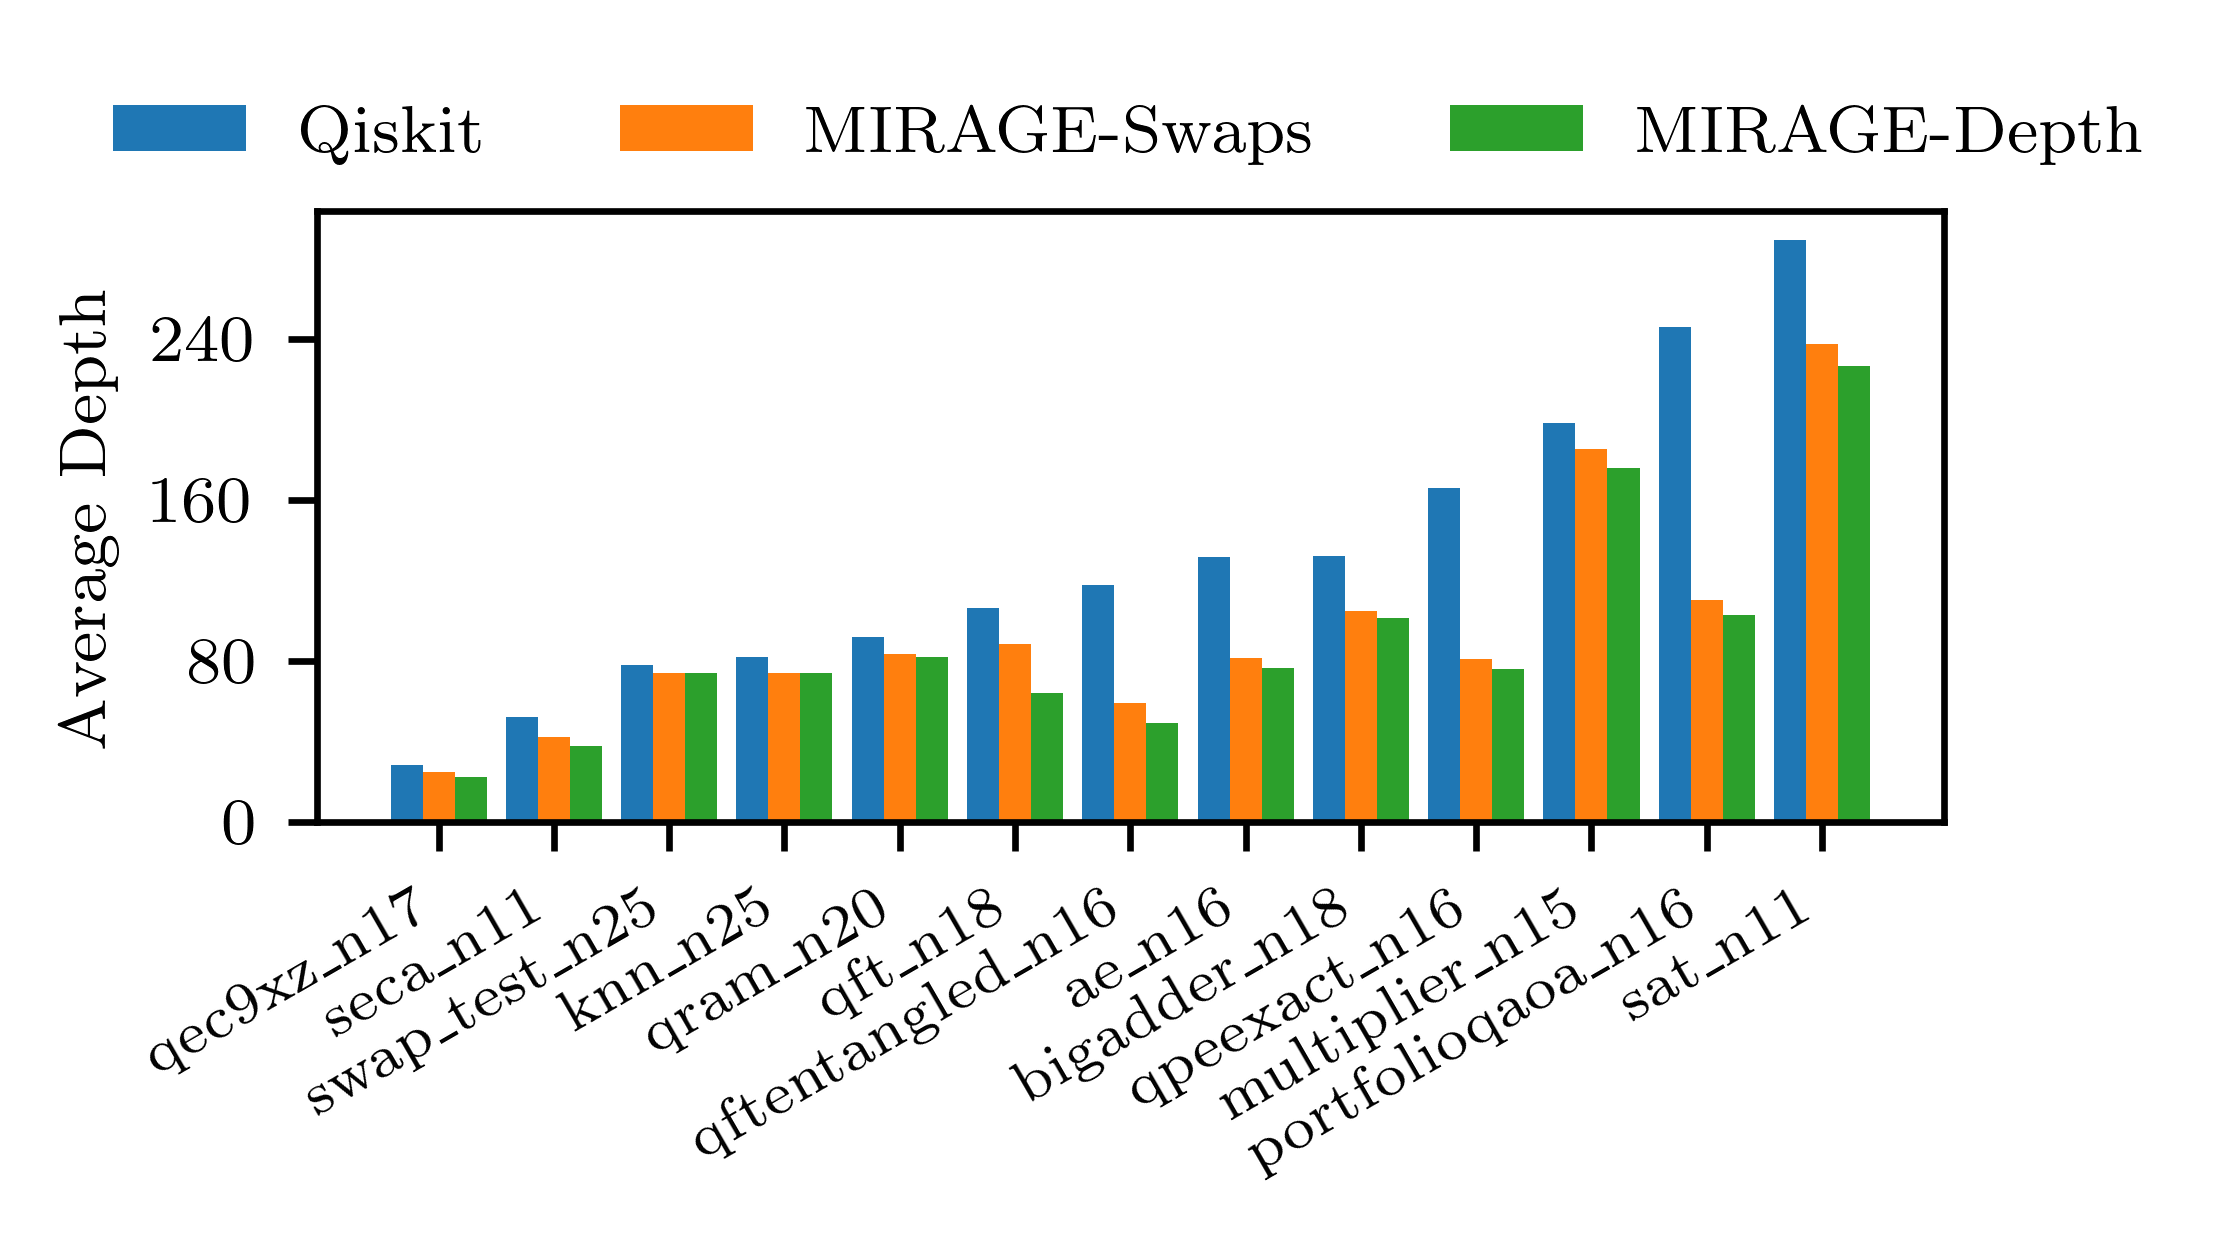

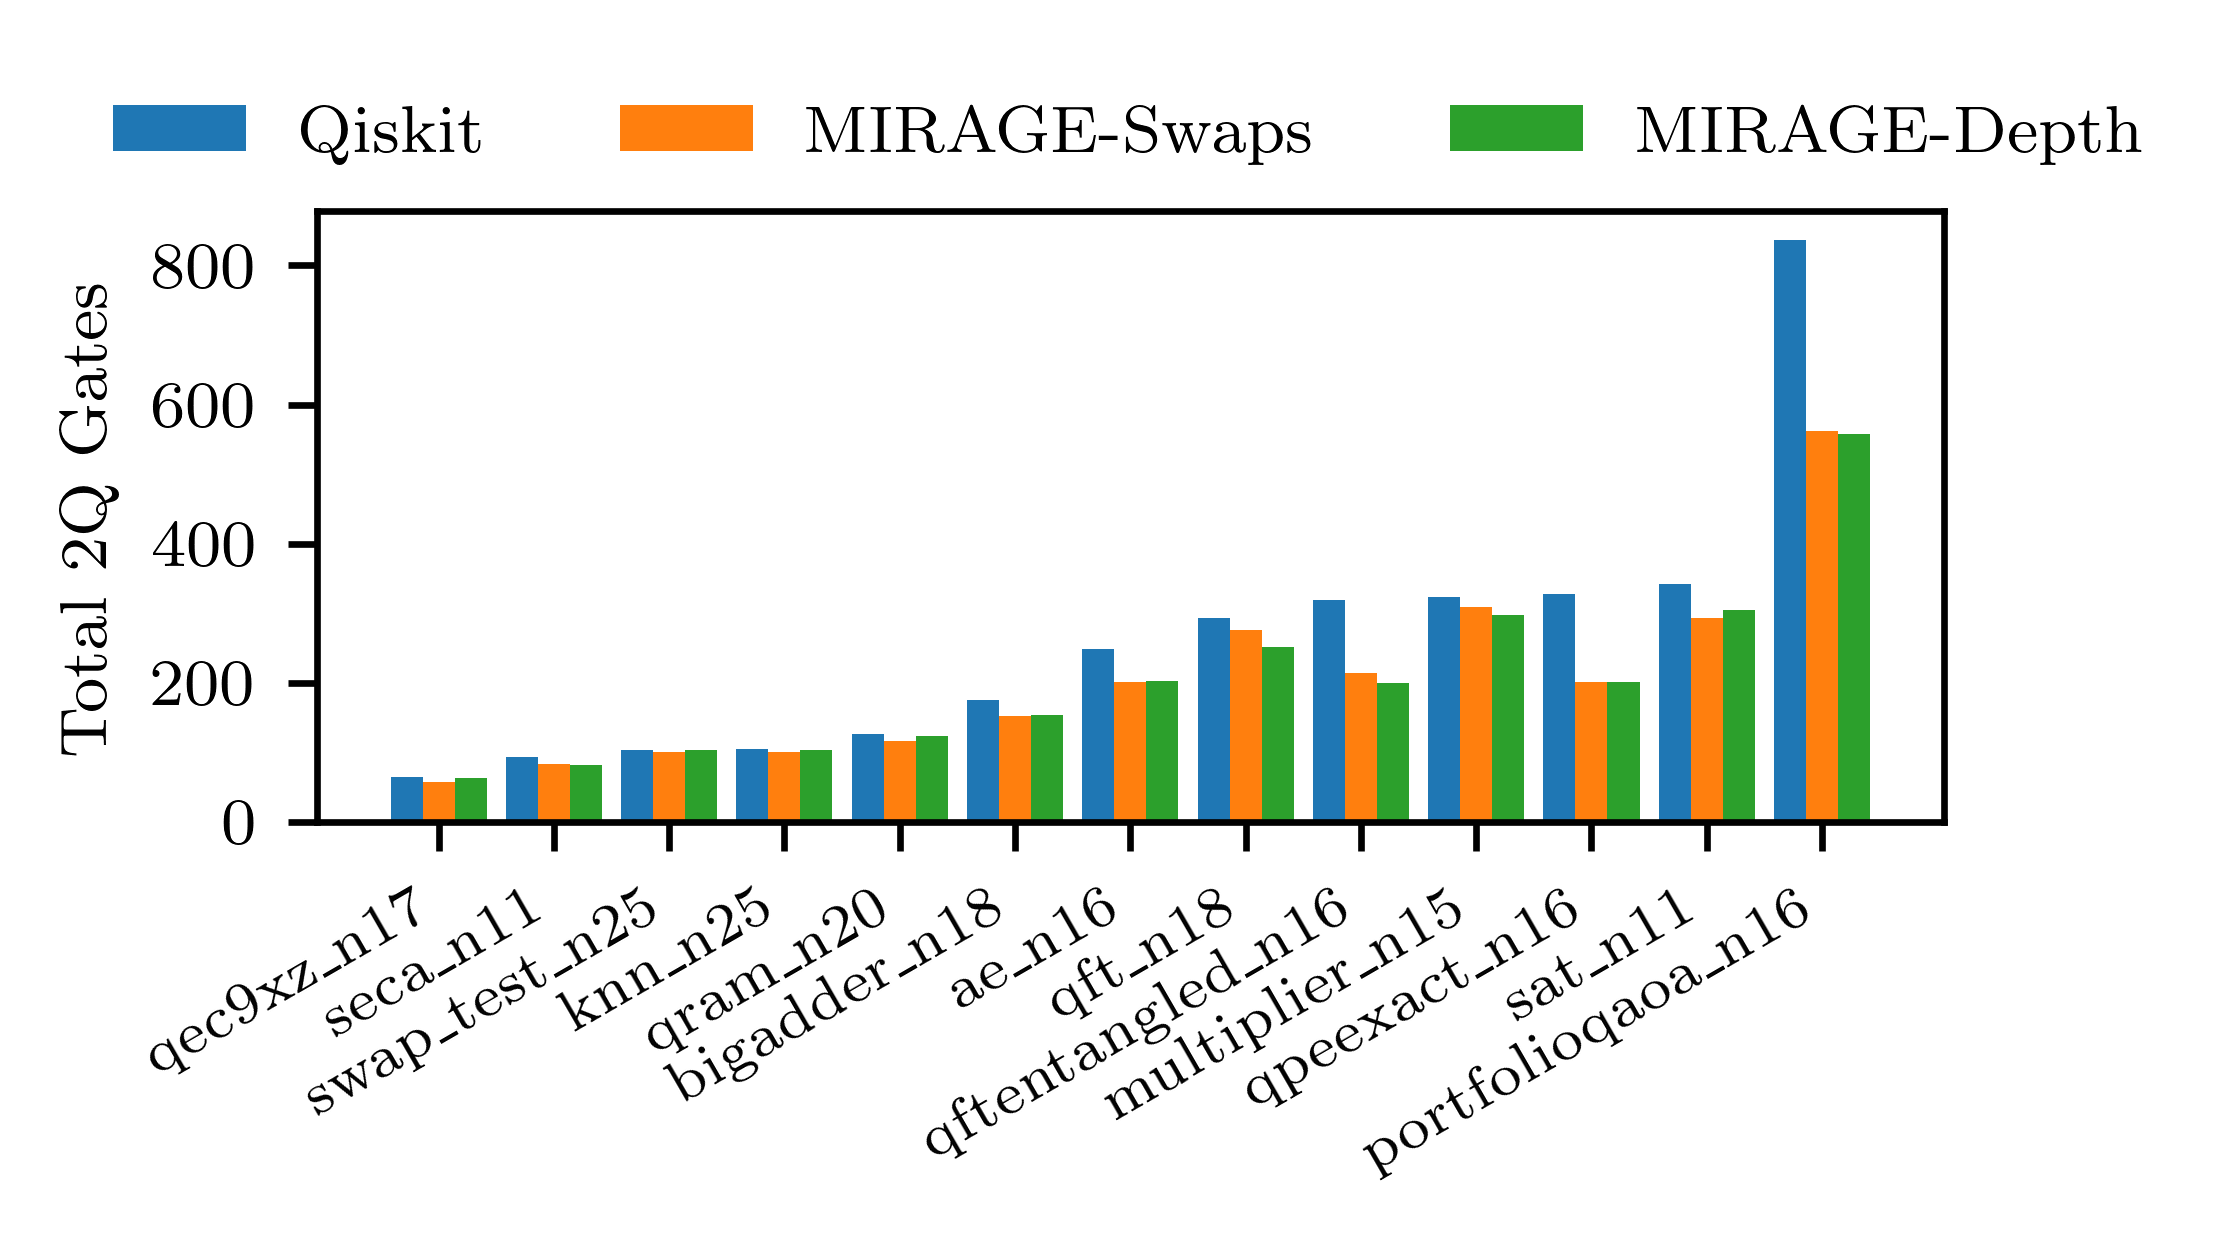

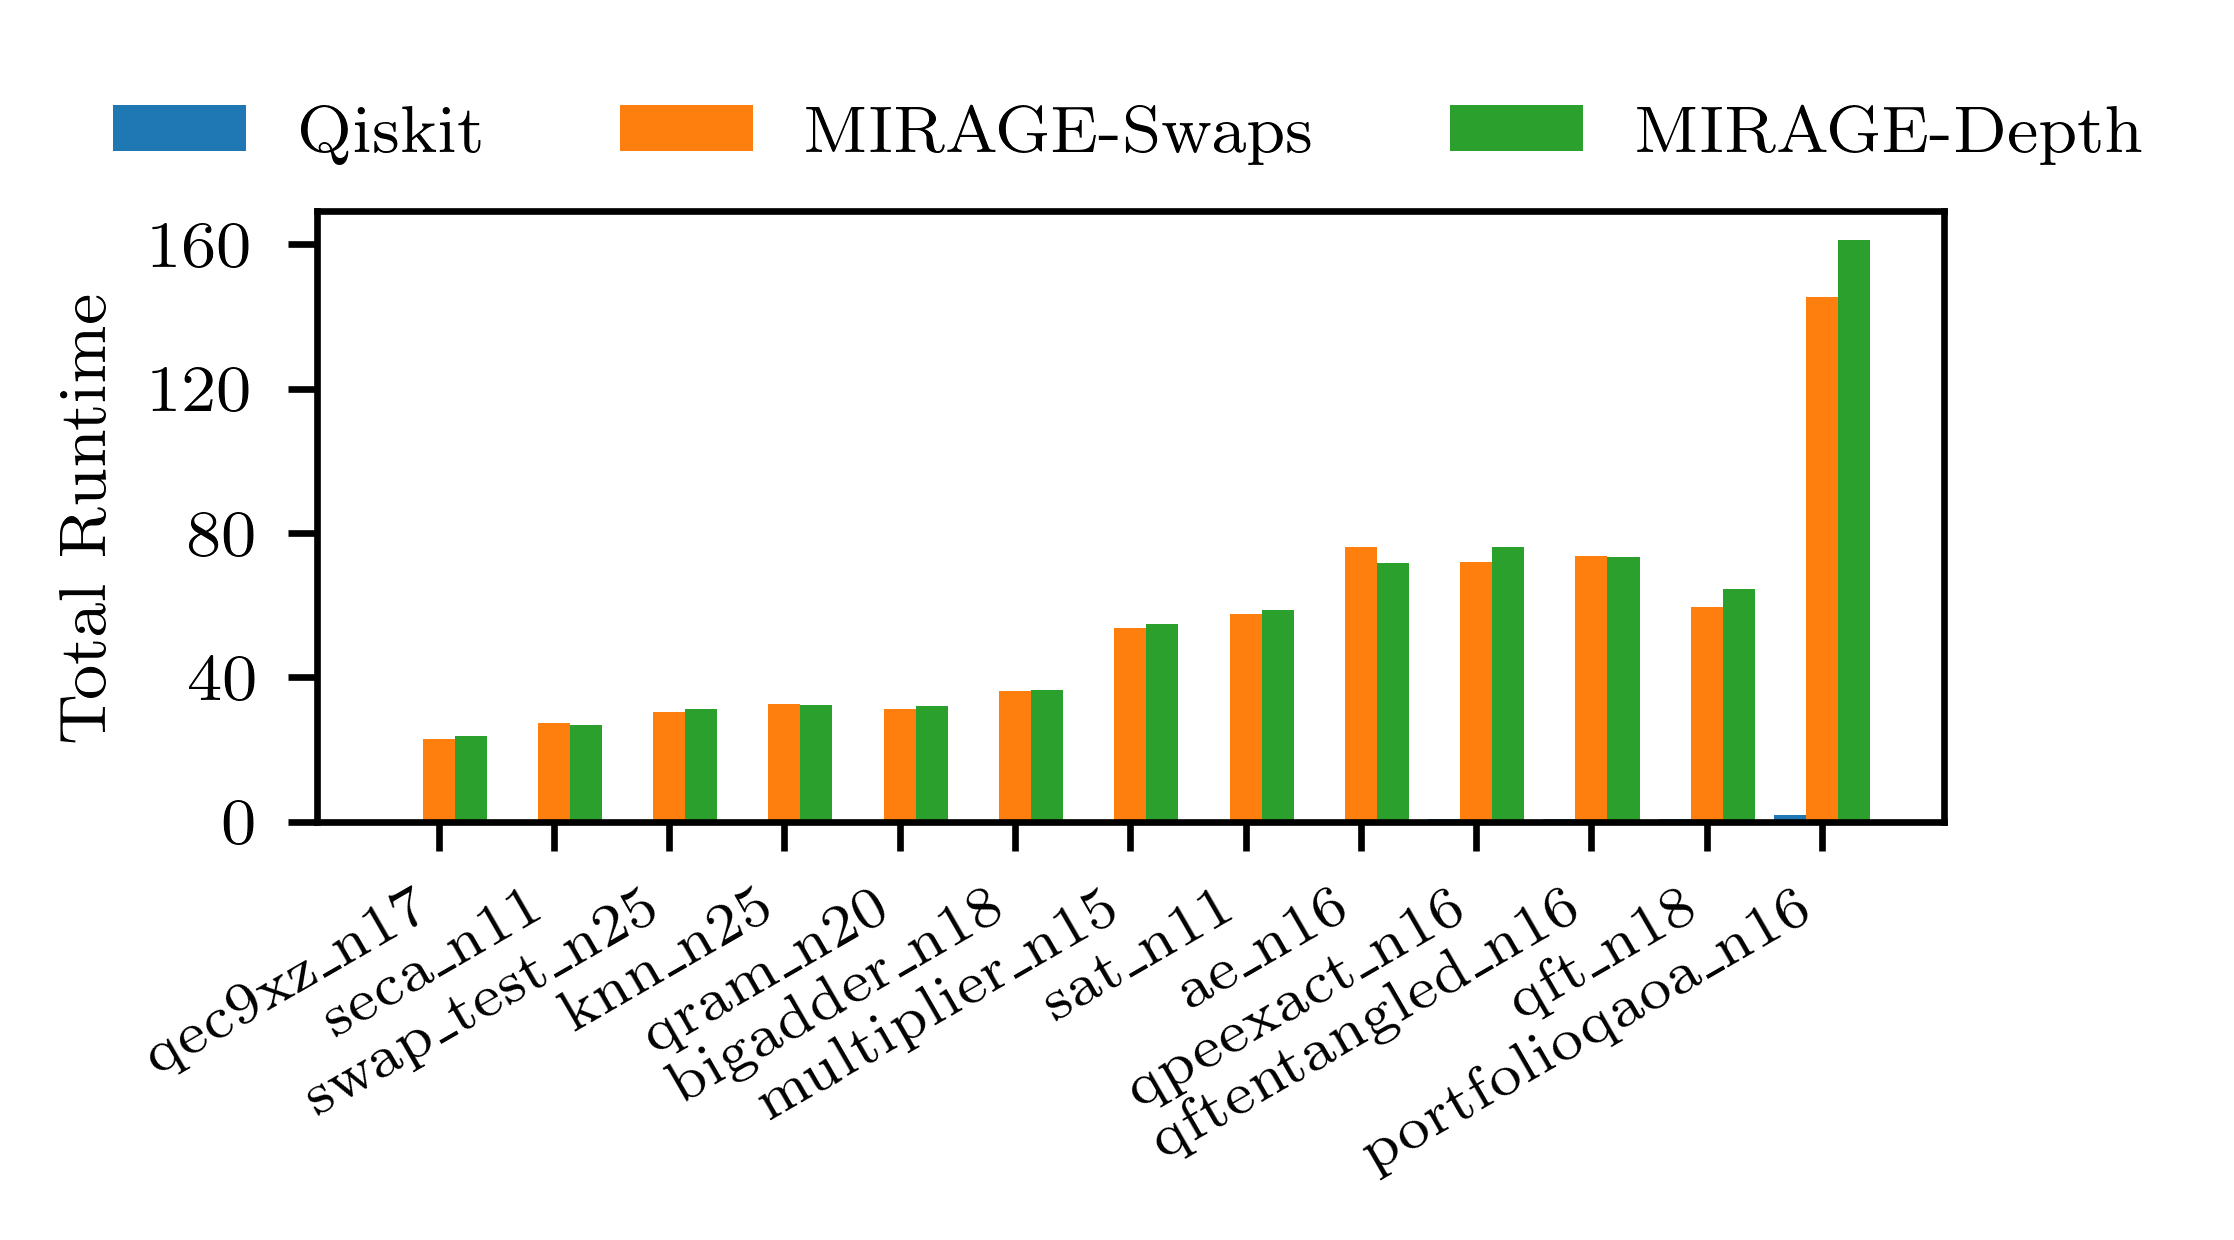

In [56]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=1,
    legend_show=1,
    filename="post",
    override_legend=["Qiskit", "MIRAGE-Swaps", "MIRAGE-Depth"],
)

In [9]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: monodromy_depth
  Circuit: ae_n16                                   Mean result: 131.549                        Trials: [135.0, 131.5, 142.0, 117.5, 133.0]
  Circuit: bigadder_n18                             Mean result: 132.055                        Trials: [137.0, 117.5, 137.5, 138.5, 131.0]
  Circuit: knn_n25                                  Mean result: 81.660                         Trials: [80.0, 81.5, 81.5, 79.0, 86.5]
  Circuit: multiplier_n15                           Mean result: 198.064                        Trials: [199.0, 204.5, 196.0, 193.0, 198.0]
  Circuit: portfolioqaoa_n16                        Mean result: 245.628                        Trials: [357.5, 213.5, 193.0, 216.0, 281.0]
  Circuit: qec9xz_n17                               Mean result: 28.406                         Trials: [27.5, 30.0, 30.5, 30.0, 24.5]
  Circuit: qft_n18                                  Mean result: 106.126                        Tri